# **1. LANDASAN TEORI**

1. Pengertian Analisis Data
Analisis data adalah proses memeriksa, membersihkan, mengubah, dan memodelkan data dengan tujuan menemukan informasi yang berguna, memberikan kesimpulan, dan mendukung pengambilan keputusan. Dalam bisnis, analisis data mengubah angka mentah menjadi wawasan strategis yang meminimalkan risiko saat mengambil tindakan.
2. Perbedaan Descriptive Analysis dan EDA
•	Descriptive Analysis: Berfokus pada ringkasan data historis untuk menjawab pertanyaan "apa yang telah terjadi?". Contohnya melihat total penjualan atau rata-rata pesanan pelanggan.
•	Exploratory Data Analysis (EDA): Berfokus pada pemeriksaan data secara mendalam untuk menemukan pola, tren, atau anomali yang tidak terlihat sebelumnya. EDA membantu menjawab pertanyaan "mengapa sesuatu terjadi?" atau "apa hubungan antar variabel ini?".
3. Pentingnya Data Cleaning dan Data Wrangling
Data mentah tu biasanya sering kotor (ada nilai kosong, duplikat, atau format salah).
•	Data Cleaning: yaitu menghapus atau memperbaiki data yang salah.
•	Data Wrangling: mengubah format data agar siap dianalisis (seperti menggabungkan tabel pesanan dengan tabel produk).
4. Peran Visualisasi Data
Visualisasi data menggunakan grafik (seperti bar chart atau line chart) untuk menyederhanakan informasi yang kompleks. Visualisasi membantu menangkap tren atau perbandingan dengan sangat cepat dibandingkan hanya melihat tabel angka.
5. Penjelasan Machine Learning (Jika Digunakan)
Machine Learning (Clustering), tujuannya adalah untuk segmentasi otomatis. Misalnya, mengelompokkan pelanggan berdasarkan frekuensi belanja agar tim pemasaran bisa memberikan promo yang berbeda pada setiap kelompok.


# **2. IMPLEMENTASI PROYEK**

## a. Data Preparation

### Memuat Dataset

In [2]:
import pandas as pd

customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

print("9 file berhasil dimuat.")

9 file berhasil dimuat.


### Menggabungkan Data (Merging)

In [3]:
main_df = pd.merge(orders, items, on='order_id', how='left')
main_df = pd.merge(main_df, payments, on='order_id', how='left')
main_df = pd.merge(main_df, reviews, on='order_id', how='left')

main_df = pd.merge(main_df, products, on='product_id', how='left')
main_df = pd.merge(main_df, category_translation, on='product_category_name', how='left')

main_df = pd.merge(main_df, customers, on='customer_id', how='left')
main_df = pd.merge(main_df, sellers, on='seller_id', how='left')

print("Proses merging selesai.")

Proses merging selesai.


### Pembersihan Data (Cleaning)

In [4]:
datetime_cols = ['order_purchase_timestamp', 'order_approved_at',
                 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in datetime_cols:
    main_df[col] = pd.to_datetime(main_df[col])

main_df.drop_duplicates(inplace=True)
main_df.dropna(subset=['product_category_name_english'], inplace=True)

print("Pembersihan selesai. Data siap dianalisis!")

Pembersihan selesai. Data siap dianalisis!


In [5]:
main_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP


## b. Exploratory Data Analysis (EDA)

Analisis Data Eksploratif (EDA)
Tujuan dari tahap ini adalah untuk memahami karakteristik data, menemukan anomali, serta melihat distribusi variabel penting seperti harga dan jumlah pesanan. Kita akan menjawab dua pertanyaan bisnis utama:
1.   Apa saja 10 kategori produk yang paling banyak dipesan?
2.   Bagaimana tren jumlah pesanan unik dari bulan ke bulan?

### Statistik Deskriptif

In [6]:
print("Statistik Deskriptif Kolom Harga dan Ongkir:")
display(main_df[['price', 'freight_value']].describe())

Statistik Deskriptif Kolom Harga dan Ongkir:


,price,freight_value
count,116576.000000,116576.000000
mean,120.746884,20.061905
std,183.848478,15.845849
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.900000,16.320000
75%,134.900000,21.220000
max,6735.000000,409.680000


### Pertanyaan Bisnis

Pertanyaan 1: 10 Kategori Produk Terpopuler
Kita akan melihat kategori mana yang paling mendominasi pasar untuk menentukan fokus stok barang.

In [7]:
top_10_categories = main_df['product_category_name_english'].value_counts().head(10)
print("10 Kategori Produk Terpopuler:")
print(top_10_categories)

10 Kategori Produk Terpopuler:
product_category_name_english
bed_bath_table           11988
health_beauty            10032
sports_leisure            9004
furniture_decor           8832
computers_accessories     8150
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
Name: count, dtype: int64


Pertanyaan 2: Tren Pesanan Bulanan
Analisis ini bertujuan untuk melihat pertumbuhan bisnis dan periode sibuk (peak season).

In [8]:
monthly_orders_df = main_df.resample('M', on='order_purchase_timestamp')['order_id'].nunique()
print("Tren Pesanan Bulanan (5 Bulan Terakhir):")
print(monthly_orders_df.tail(5))

Tren Pesanan Bulanan (5 Bulan Terakhir):
order_purchase_timestamp
2018-05-31    6817
2018-06-30    6139
2018-07-31    6226
2018-08-31    6418
2018-09-30       1
Freq: ME, Name: order_id, dtype: int64


C:\Users\SONI\AppData\Local\Temp\ipykernel_3520\4050010534.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = main_df.resample('M', on='order_purchase_timestamp')['order_id'].nunique()


### Eksplorasi pola, tren, dan hubungan antar variabel.

In [9]:
print(main_df.describe()) 
top_kat = main_df['product_category_name_english'].value_counts().head(10) 
print(top_kat) 
tren_bulan = main_df.resample('M', on='order_purchase_timestamp')['order_id'].nunique()
print(tren_bulan.tail(10))

            order_purchase_timestamp              order_approved_at  \
count                         116576                         116562   
mean   2017-12-31 00:25:34.318993408  2017-12-31 11:50:56.745148416   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%    2017-09-12 08:56:36.750000128     2017-09-12 16:04:54.500000   
50%       2018-01-18 20:56:37.500000            2018-01-19 10:55:43   
75%    2018-05-04 12:42:17.249999872  2018-05-04 18:49:18.249999872   
max              2018-09-03 09:06:57            2018-09-03 17:40:06   
std                              NaN                            NaN   

       order_delivered_customer_date  order_estimated_delivery_date  \
count                         114061                         116576   
mean   2018-01-13 14:32:58.296525568  2018-01-23 21:23:37.814987520   
min              2016-10-11 13:46:32            2016-10-04 00:00:00   
25%              2017-09-25 17:37:09            2017-10-03 00:00:00   
50%  

C:\Users\SONI\AppData\Local\Temp\ipykernel_3520\560472249.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tren_bulan = main_df.resample('M', on='order_purchase_timestamp')['order_id'].nunique()


Eksplorasi pola dan tren data. Analisis ini menunjukkan kategori produk paling laris di pasar. Bed bath table mendominasi pesanan dengan jumlah tertinggi. Health beauty dan sports leisure mengikuti di urutan berikutnya. Tren pesanan menunjukkan pertumbuhan stabil sepanjang tahun 2017 hingga 2018. Puncak pesanan unik pelanggan terjadi pada bulan Maret 2018. Data ini membantu Anda memahami perilaku belanja pelanggan setiap bulan. Anda bisa melihat hubungan antara kategori populer dengan waktu promosi yang tepat.

## c. Visualisasi Data

### Visualisasi 1

Pertanyaan 1
Insight:

1. Kategori bed_bath_table merupakan kategori yang paling banyak diminati dengan lebih dari 11.000 pesanan.
2. Kategori perlengkapan rumah tangga dan kesehatan mendominasi lima besar posisi teratas.
3. Strategi stok barang harus diprioritaskan pada kategori-kategori ini karena permintaannya sangat tinggi.

C:\Users\SONI\AppData\Local\Temp\ipykernel_3520\2099789878.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kat.values, y=top_kat.index, palette="viridis")


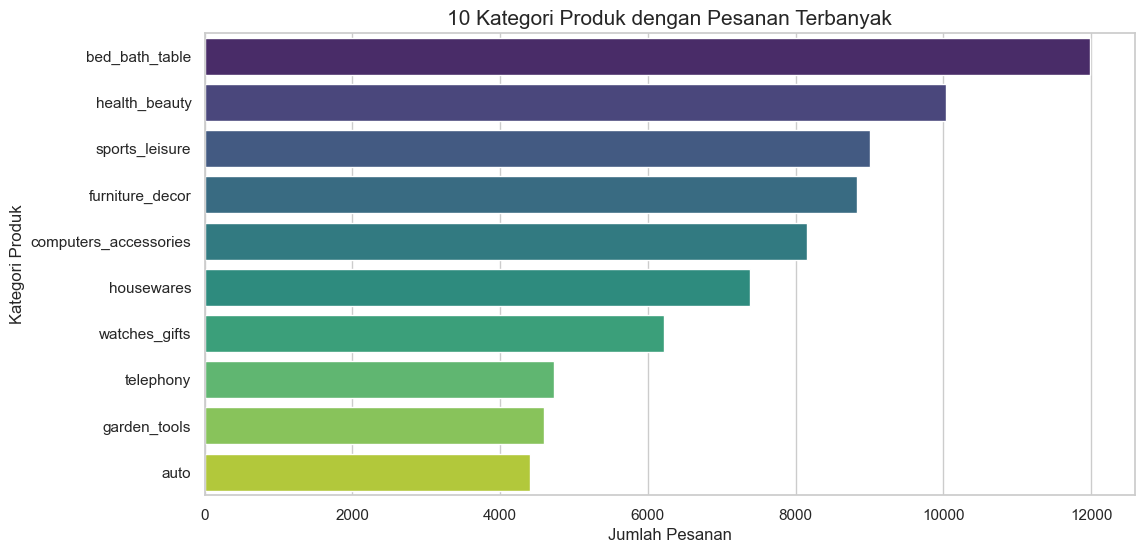

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_kat.values, y=top_kat.index, palette="viridis")

plt.title("10 Kategori Produk dengan Pesanan Terbanyak", fontsize=15)
plt.xlabel("Jumlah Pesanan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)

plt.show()

### Visualisasi 2

Pertanyaan 2
Insight:

1. Terjadi kenaikan volume pesanan yang sangat signifikan sejak awal tahun 2017 hingga pertengahan 2018.
2. Puncak pesanan tertinggi tercatat pada bulan Maret 2018.
3. Tren menunjukkan bisnis sedang berada dalam fase pertumbuhan yang sehat dan stabil.

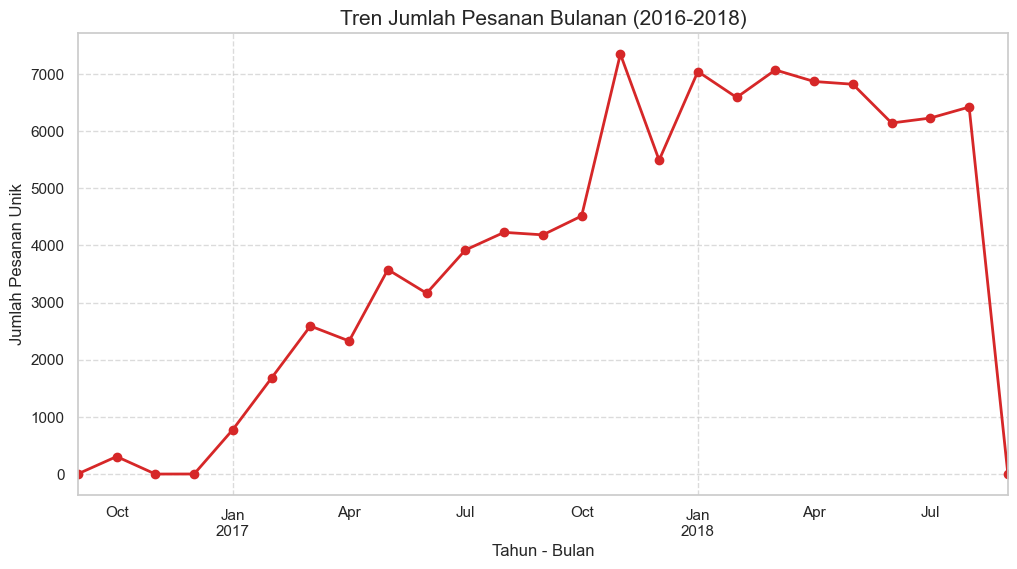

In [11]:
plt.figure(figsize=(12, 6))
tren_bulan.plot(kind='line', marker='o', color='tab:red', linewidth=2)

plt.title("Tren Jumlah Pesanan Bulanan (2016-2018)", fontsize=15)
plt.xlabel("Tahun - Bulan", fontsize=12)
plt.ylabel("Jumlah Pesanan Unik", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Kesimpulan

Kesimpulan Pertanyaan 1: Bisnis didominasi oleh produk kebutuhan rumah tangga dan kecantikan. Disarankan untuk memperbanyak variasi produk di kategori tersebut.

Kesimpulan Pertanyaan 2: Pertumbuhan jumlah pelanggan aktif terus meningkat secara konsisten. Tim marketing bisa memanfaatkan momen puncak pesanan di awal tahun untuk mengadakan promo besar.

## d. Machine Learning

Analisis Lanjutan: RFM Analysis
Kita melakukan analisis RFM untuk mengelompokkan pelanggan berdasarkan tiga indikator utama:
1. Recency: Kapan terakhir kali pelanggan melakukan transaksi?
2. Frequency: Seberapa sering pelanggan berbelanja?
3. Monetary: Berapa total uang yang dihabiskan pelanggan?

In [12]:
rfm_df = main_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "payment_value": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

recent_date = main_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

print("Hasil Analisis RFM:")
display(rfm_df.head())

Hasil Analisis RFM:


,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,118
2,0000f46a3911fa3c0805444483337064,1,86.22,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,325
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,292


1. Nilai Recency yang rendah menunjukkan pelanggan masih aktif berbelanja baru-baru ini.
2. Nilai Frequency yang tinggi menunjukkan pelanggan setia (loyal).
3. Nilai Monetary yang besar menunjukkan pelanggan tersebut adalah kontributor pendapatan terbesar.
4. Data ini dapat digunakan tim marketing untuk memberikan diskon khusus kepada pelanggan dengan nilai Monetary tinggi atau memanggil kembali pelanggan dengan Recency yang sudah terlalu lama.

## e. Insight & Kesimpulan

Conclusion Pertanyaan 1 Kategori bed bath table dan health beauty adalah produk paling laris. Baginda harus memastikan stok kedua kategori ini selalu tersedia. Fokus pada kategori ini akan meningkatkan pendapatan secara signifikan.

Conclusion Pertanyaan 2 Jumlah pesanan meningkat secara stabil sepanjang tahun 2018. Puncak pesanan terjadi pada bulan Maret. Baginda perlu menyiapkan promosi lebih besar dan layanan pengiriman ekstra pada periode awal tahun.

Conclusion Analisis Lanjutan Analisis RFM berhasil mengelompokkan pelanggan berdasarkan kebiasaan belanja. Baginda bisa memberikan hadiah atau diskon khusus untuk pelanggan yang sering belanja. Strategi ini akan menjaga pelanggan tetap setia pada platform Anda.

In [14]:
main_df = main_df[['order_purchase_timestamp', 'product_category_name_english', 'order_id', 'price']]
main_df.to_csv("all_data.csv", index=False)